In [1]:
using Plots
plot();
using Distributions
using Statistics

In [6]:
σw=1
σz=2
n=1000
ϕ=0.5

Z=rand(Normal(0,σz), n+1)
S=rand(Normal(0,σw), n)
X=@.Z[2:end]+ϕ*Z[1:end-1]+S;

In [7]:
γ(X,h)=begin
    n=length(X)
    x=mean(X)
    sum(@. (X[h+1:end]-x)*(X[1:n-h]-x) )/n
end

γ (generic function with 1 method)

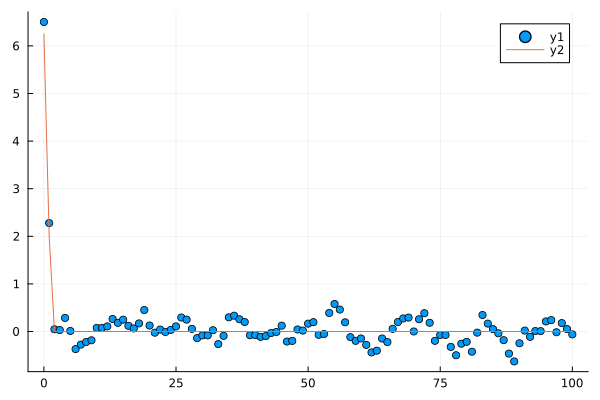

In [8]:
scatter(0:100,h->γ(X,h))
plot!([0,1,2,100],[(σw^2+σz^2)*(1+ϕ^2),ϕ*σz^2,0,0])

#  Zad 3

In [9]:
σz=2
n=1000
ϕ=0.5
σu=σz*ϕ

Z=rand(Normal(0,σz), n+1)
X=@.Z[2:end]+ϕ*Z[1:end-1];

U=rand(Normal(0,σu), n+1)
Y=@.U[2:end]+U[1:end-1]/ϕ;

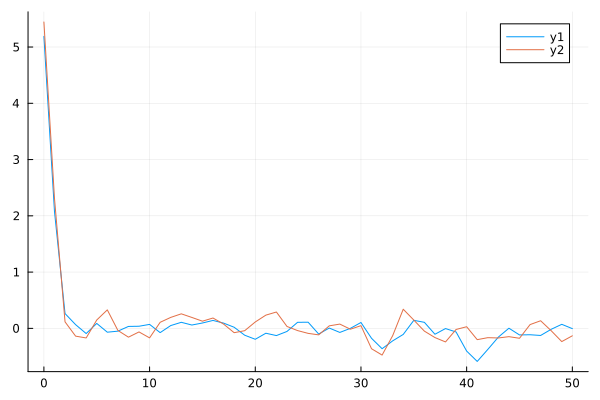

In [10]:
plot(0:50,h->γ(X,h))
plot!(0:50,h->γ(Y,h))

# Zad 4

In [11]:
using SingularSpectrumAnalysis
using LsqFit

In [33]:
n=1000
θ=0.5
σ=1
a₁,a₂=0.05,5
b₁,b₂=2,50

m(t)=a₁*t+a₂
s(t)=b₁*sin(t*(2π/b₂))

Z=rand(Normal(0,σ), n+1)
Y=@.Z[2:end]+θ*Z[1:end-1];

X=@. Y+ s.(1:n) + m.(1:n);

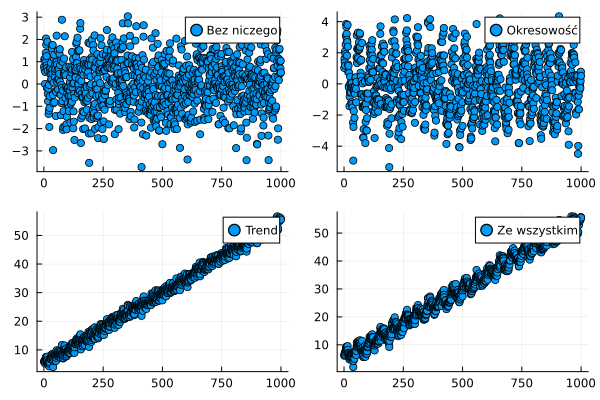

In [34]:
plot(scatter(Y, label="Bez niczego"),scatter(Y .+ s.(1:n), label="Okresowość"),scatter(Y .+ m.(1:n), label="Trend"), scatter(X, label="Ze wszystkim"))

In [14]:
fit_trend(X,1)

([1 1; 1 2; … ; 1 999; 1 1000], [5.123531682620265, 0.04975500506452483])

In [15]:
@. model(x,p)= p[1]*x+p[2]

model (generic function with 1 method)

In [16]:
fit=curve_fit(model,1:n,X,[1.,1.])

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([0.0497550050696694, 5.123531679647238], [-0.7513003742531454, -0.7946033969925654, 0.7060374200729731, 0.5958401633962316, -1.8596114194525555, -0.48970809172397356, -1.0579083658097694, -2.918292255706863, -2.786289110823505, -1.4843886104092778  …  0.8819961733026602, 1.2368727453479593, 2.7478046309998447, 1.4638121748143718, 1.6922175991161907, 0.9361716321941032, 1.825840533993393, 1.801900296863252, 1.0107479809613409, 1.5414542643311862], [1.0000000000235538 1.0000000000029172; 2.0000000000471077 1.0000000000029172; … ; 998.9999999994758 1.0000000000315448; 999.9999999994993 1.0000000000315448], true, Float64[])

In [17]:
fit.param

2-element Vector{Float64}:
 0.0497550050696694
 5.123531679647238

In [18]:
W=X.- model.(1:n,Ref(fit.param));

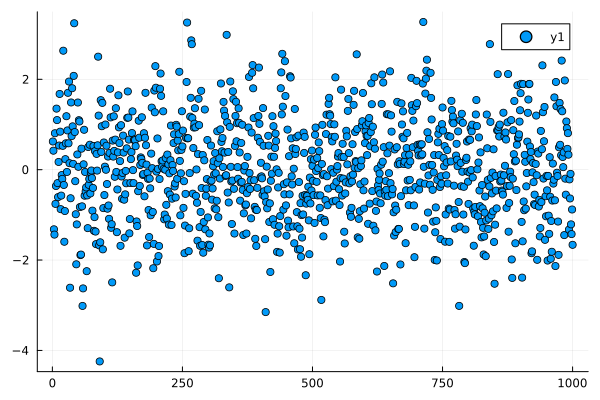

In [19]:
scatter(Y)

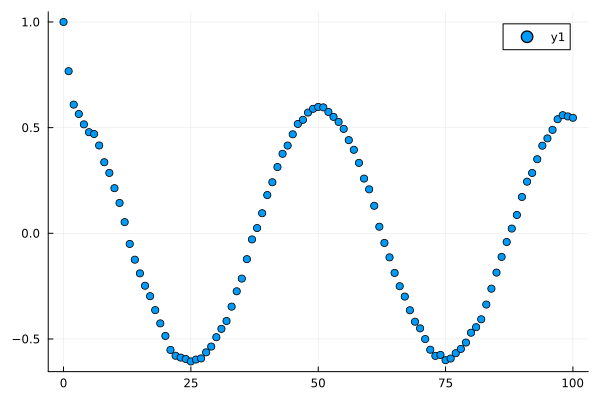

In [20]:
scatter(0:100,h->γ(W,h)/γ(W,0))

In [21]:
@. model2(x,p)=p[1]*sin(x*(2π/p[2]))

model2 (generic function with 1 method)

In [22]:
fit2=curve_fit(model2,1:n,W,[3.,50.])

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([1.9828209723099353, 50.00295854794563], [-0.5028016366454485, -0.30152443218785385, 1.4359213812003842, 1.5510197750532742, -0.6941981301691742, 0.8675617834114864, 0.4698156679983605, -1.244204336636536, -0.9922355530270688, 0.40134063337054915  …  -0.9182857553908608, -0.445069087933909, 1.2107249859471862, 0.09583251754343225, 0.5149092365085306, -0.03190077373276634, 1.0822693606897036, 1.2945555319793045, 0.7476298089734899, 1.5267117256172618], [0.12532585698603751 -0.004943496862082375; 0.2486754839120582 -0.00965251617579639; … ; -0.13269890507660134 -4.933778000301458; -0.007435133542414439 -4.982644740973113], true, Float64[])

In [23]:
fit2.param

2-element Vector{Float64}:
  1.9828209723099353
 50.00295854794563

In [24]:
V=W .-model2.(1:n,Ref(fit2.param));

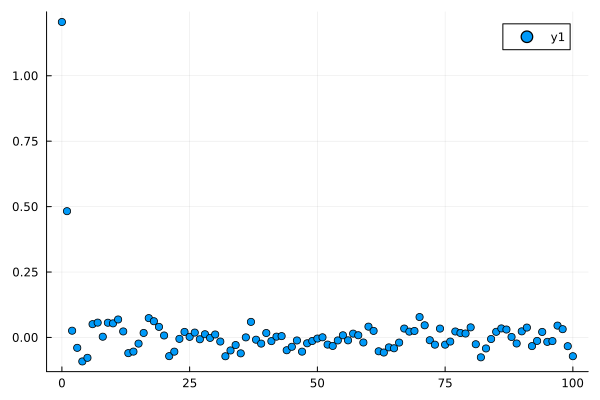

In [30]:
scatter(0:100,h->γ(V,h))

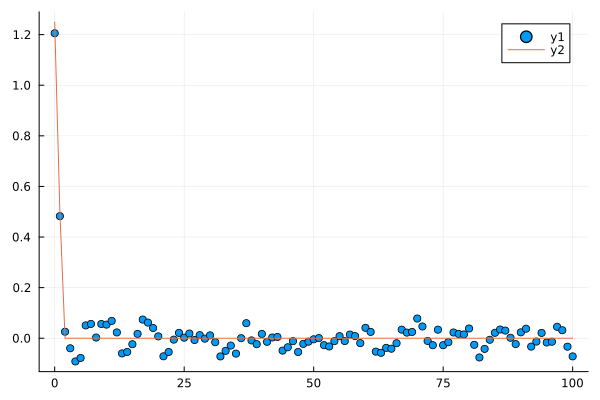

In [31]:
plot!([0,1,2,100],[(σ^2)*(1+θ^2),θ*σ^2,0,0])

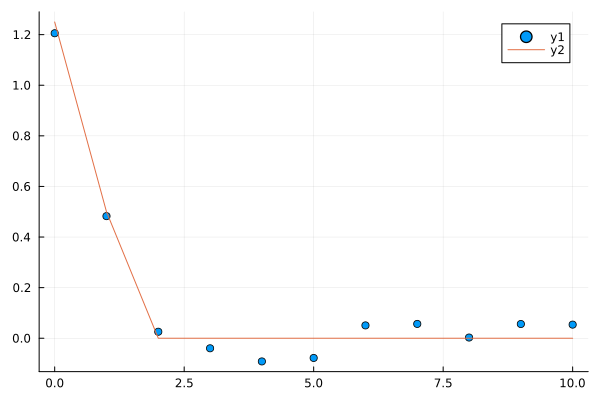

In [32]:
scatter(0:10,h->γ(V,h))
plot!([0,1,2,10],[(σ^2)*(1+θ^2),θ*σ^2,0,0])